In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [3]:
data1 = pd.DataFrame(create_dataset_00())
data2 = pd.DataFrame(create_dataset_01())

C:\Users\gcvpi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


# Q1-1

In [4]:
data1_new = data1.copy()
data2_new = data2.copy()

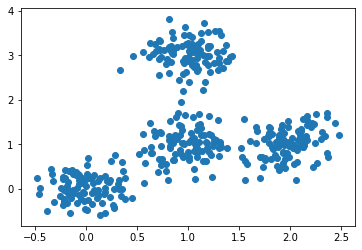

In [5]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1])

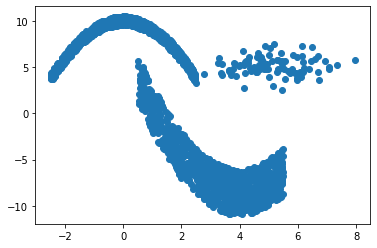

In [6]:
plt.scatter(data2.iloc[:,0],data2.iloc[:,1])

# KMEANS

In [7]:
kmeans1 = KMeans(n_clusters=4).fit(data1_new)
labels1 = kmeans1.predict(data1_new)
data1_new['clusterid'] = labels1

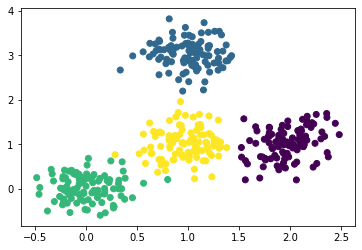

In [8]:
plt.scatter(data1_new.iloc[:,0],data1_new.iloc[:,1],c = data1_new.iloc[:,-1])
plt.show()

In [9]:
kmeans2 = KMeans(n_clusters=3).fit(data2_new)
labels2 = kmeans2.predict(data2_new)
data2_new['clusterid'] = labels2

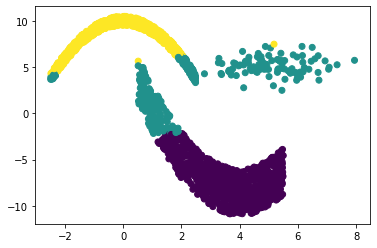

In [10]:
plt.scatter(data2_new.iloc[:,0],data2_new.iloc[:,1],c = data2_new.iloc[:,-1])
plt.show()

# DBSCAN

In [11]:
dbscan1 = DBSCAN(eps = 0.2,min_samples=10).fit(data1)
labels_db1 = dbscan1.labels_
data1_new['clusterid_db'] = labels_db1

In [12]:
data1_new['clusterid_db'].value_counts()

 2    89
 0    89
 3    87
 1    85
-1    50
Name: clusterid_db, dtype: int64

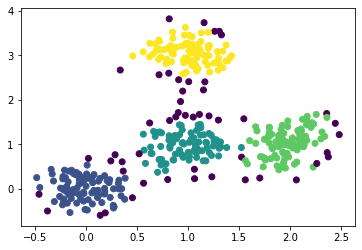

In [13]:
plt.scatter(data1_new.iloc[:,0],data1_new.iloc[:,1],c = data1_new.iloc[:,-1])
plt.show()

In [14]:
dbscan2 = DBSCAN().fit(data2)
labels_db2 = dbscan2.labels_
data2_new['clusterid_db'] = labels_db2

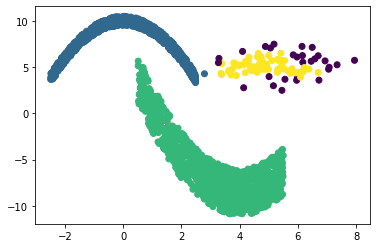

In [15]:
plt.scatter(data2_new.iloc[:,0],data2_new.iloc[:,1],c = data2_new.iloc[:,-1])
plt.show()

# Mean-shift

In [16]:
from sklearn.cluster import MeanShift

In [17]:
ms1 = MeanShift(bandwidth=0.5).fit(data1)
labels_ms1 = ms1.labels_
data1_new['clusterid_ms'] = labels_ms1

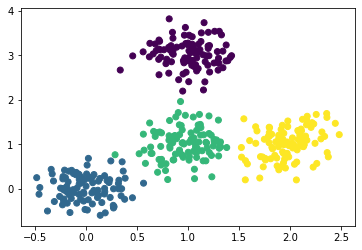

In [18]:
plt.scatter(data1_new.iloc[:,0],data1_new.iloc[:,1],c = data1_new.iloc[:,-1])
plt.show()

In [19]:
ms2 = MeanShift(bandwidth=2.8).fit(data2)
labels_ms2 = ms2.labels_
data2_new['clusterid_ms'] = labels_ms2

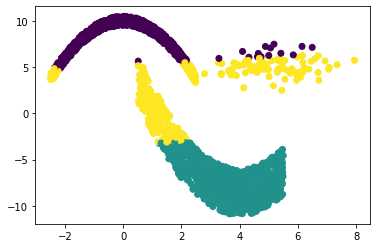

In [20]:
plt.scatter(data2_new.iloc[:,0],data2_new.iloc[:,1],c = data2_new.iloc[:,-1])
plt.show()

# Q1-2

In [22]:
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf

C:\Users\gcvpi\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data1_new.iloc[:,:2].values
y = data1_new.iloc[:,2].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
268/268 [==============================] - 0s 302us/step - loss: 1.3637 - accuracy: 0.3955
Epoch 2/50
268/268 [==============================] - 0s 34us/step - loss: 1.3373 - accuracy: 0.4254
Epoch 3/50
268/268 [==============================] - 0s 45us/step - loss: 1.3126 - accuracy: 0.4813
Epoch 4/50
268/268 [==============================] - 0s 45us/step - loss: 1.2890 - accuracy: 0.4813
Epoch 5/50
268/268 [==============================] - 0s 48us/step - loss: 1.2667 - accuracy: 0.4701
Epoch 6/50
268/268 [==============================] - 0s 48us/step - loss: 1.2459 - accuracy: 0.4888
Epoch 7/50
268/268 [==============================] - 0s 52us/step - loss: 1.2258 - accuracy: 0.5373
Epoch 8/50
268/268 [==============================] - 0s 45us/step - loss: 1.2069 - accuracy: 0.5597
Epoch 9/50
268/268 [==============================] - 0s 56us/step - loss: 1.1877 - accuracy: 0.5896
Epoch 10/50
268/268 [==============================] - 0s 60us/step - loss: 1.1702 - accur

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test)

test_acc

132/132 [==============================] - 0s 265us/step


0.939393937587738

In [64]:
# The accuracy of testing data is 94%